In [1]:
import pandas as pd

flightdata = pd.read_csv('D:\CS588FinalProject\delayflight.csv')
flightdata.head()


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y


In [169]:
flightdata['UniqueCarrier'].value_counts()

airline = pd.read_csv('D:\CS588FinalProject\carrier.csv')
total = pd.merge(flightdata, airline)
total.head()

names=pd.read_csv('D:\CS588FinalProject\months.csv')
flights_months = pd.merge(names, total)
flights_months.head()

week=pd.read_csv('D:\CS588FinalProject\daysinweek.csv')
week = pd.merge(flights_months, week)
week.head()

,Month,Month_name,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,AIRLINE,Name
0,1,January,4,3,1711,AA,ORD,STL,258,Y,American Airlines Inc.,Wednesday
1,1,January,5,3,1642,AA,BOS,DFW,1562,N,American Airlines Inc.,Wednesday
2,1,January,26,3,1549,AA,MIA,RDU,700,N,American Airlines Inc.,Wednesday
3,1,January,25,3,1435,AA,DFW,SEA,1660,N,American Airlines Inc.,Wednesday
4,1,January,26,3,1955,AA,DFW,ORD,802,N,American Airlines Inc.,Wednesday


Text(0, 0.5, 'No. of flights')

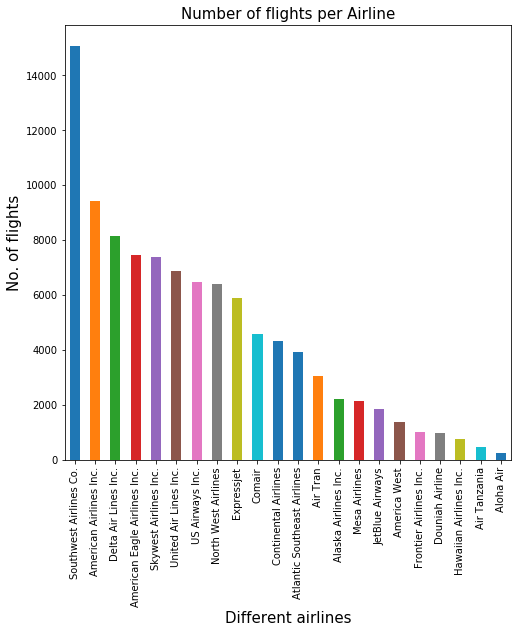

In [123]:
plt.figure(figsize=(8,8))
total['AIRLINE'].value_counts().plot('bar')

plt.title('Number of flights per Airline', fontsize = 15)
plt.xlabel('Different airlines', fontsize = 15)
plt.ylabel('No. of flights', fontsize = 15)


Text(0, 0.5, 'No. of flights')

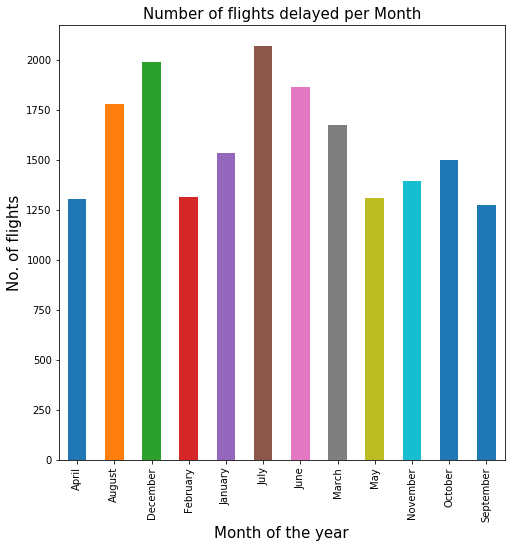

In [156]:
monthlydelaycount = pd.crosstab(flights_months['Month_name'],flights_months['dep_delayed_15min'])

plt.figure(figsize=(8,8))
monthlydelaycount['Y'].plot('bar')

plt.title('Number of flights delayed per Month', fontsize = 15)
plt.xlabel('Month of the year', fontsize = 15)
plt.ylabel('No. of flights', fontsize = 15)


Text(0, 0.5, 'Percentage of flights delayed per that month')

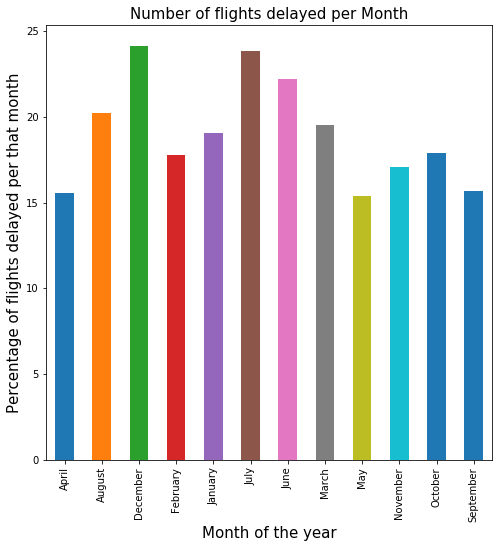

In [159]:
monthlydelaycount = pd.DataFrame(monthlydelaycount)
monthlydelaycount['sum'] = monthlydelaycount['Y'] + monthlydelaycount['N']
monthlydelaycount['Pecentage_of_delays'] = (monthlydelaycount['Y']/monthlydelaycount['sum'])*100
monthlydelaycount.head()
plt.figure(figsize=(8,8))
monthlydelaycount['Pecentage_of_delays'].plot('bar')

plt.title('Number of flights delayed per Month', fontsize = 15)
plt.xlabel('Month of the year', fontsize = 15)
plt.ylabel('Percentage of flights delayed per that month', fontsize = 15)

Text(0, 0.5, 'No. of flights')

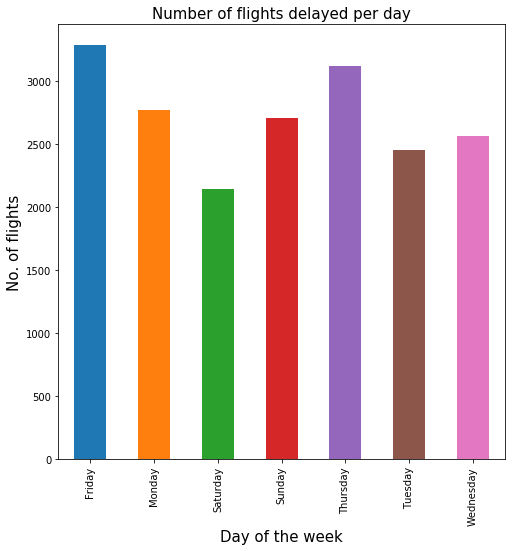

In [171]:
daydelaycount = pd.crosstab(week['Name'],week['dep_delayed_15min'])

plt.figure(figsize=(8,8))
daydelaycount['Y'].plot('bar')

plt.title('Number of flights delayed per day', fontsize = 15)
plt.xlabel('Day of the week', fontsize = 15)
plt.ylabel('No. of flights', fontsize = 15)


Text(0, 0.5, 'Percentage of flights delayed per that day')

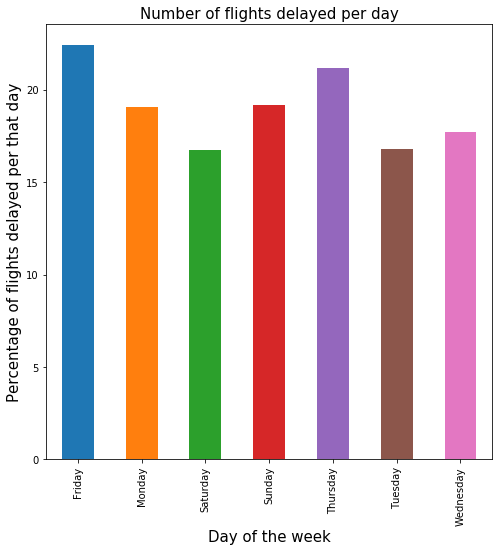

In [173]:
daydelaycount = pd.DataFrame(daydelaycount)
daydelaycount['sum'] = daydelaycount['Y'] + daydelaycount['N']
daydelaycount['Pecentage_of_delays'] = (daydelaycount['Y']/daydelaycount['sum'])*100
daydelaycount.head()
plt.figure(figsize=(8,8))
daydelaycount['Pecentage_of_delays'].plot('bar')

plt.title('Number of flights delayed per day', fontsize = 15)
plt.xlabel('Day of the week', fontsize = 15)
plt.ylabel('Percentage of flights delayed per that day', fontsize = 15)

Text(0, 0.5, 'Percentage of flights on time for the Airline')

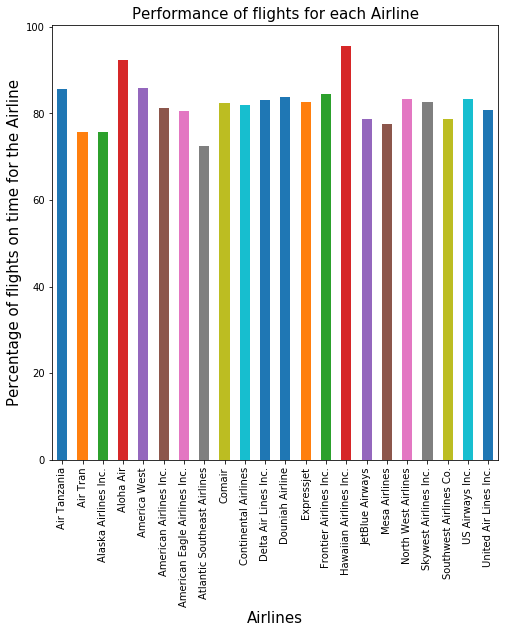

In [166]:
carriercount = pd.DataFrame(pd.crosstab(total['AIRLINE'],total['dep_delayed_15min']))

carrierdelaycount = pd.DataFrame(carriercount)
carrierdelaycount['sum'] = carrierdelaycount['Y'] + carrierdelaycount['N']
carrierdelaycount['Pecentage_of_delays'] = (carrierdelaycount['N']/carrierdelaycount['sum'])*100
carrierdelaycount.head()
plt.figure(figsize=(8,8))
carrierdelaycount['Pecentage_of_delays'].plot('bar')

plt.title('Performance of flights for each Airline', fontsize = 15)
plt.xlabel('Airlines', fontsize = 15)
plt.ylabel('Percentage of flights on time for the Airline', fontsize = 15)

Text(0, 0.5, 'Percentage of flights delayed for the Airline')

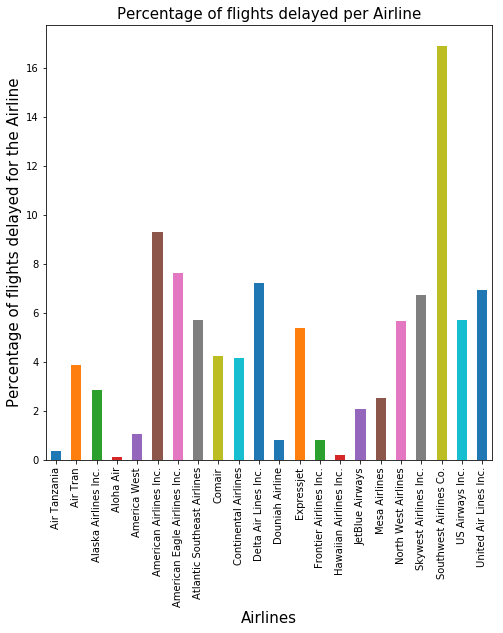

In [164]:
carriercount = pd.DataFrame(pd.crosstab(total['AIRLINE'],total['dep_delayed_15min']))

carrierdelaycount['Pecentage_of_delays'] = (carrierdelaycount['Y']/carrierdelaycount['Y'].sum())*100
carrierdelaycount.head()
plt.figure(figsize=(8,8))
carrierdelaycount['Pecentage_of_delays'].plot('bar')

plt.title('Percentage of flights delayed per Airline', fontsize = 15)
plt.xlabel('Airlines', fontsize = 15)
plt.ylabel('Percentage of flights delayed for the Airline', fontsize = 15)

In [52]:
airports = pd.read_csv('D:\CS588FinalProject\latlongairport.csv')

In [67]:
count_flights = flightdata['Origin'].value_counts()

5834

In [81]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
#___________________________
plt.figure(figsize=(11,11))
#________________________________________
# define properties of markers and labels

size_limits = [1, 100, 500, 1000, 3000, 6000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1]))


<Figure size 792x792 with 0 Axes>

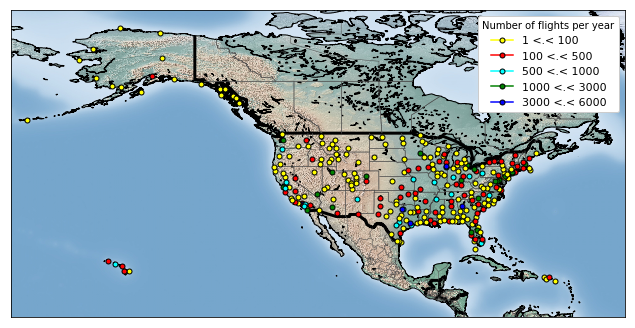

In [82]:
plt.figure(figsize=(11,11))
#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')
#_____________________
# put airports on map
for index, (code, y, x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    if count_flights[code] < 100:
        map.plot(x, y, marker='o', markersize = 5, markeredgewidth = 1, color = 'yellow',
             markeredgecolor='k', label = labels[0])
    if count_flights[code] > 99 and count_flights[code] < 500:
        map.plot(x, y, marker='o', markersize = 5, markeredgewidth = 1, color = 'red',
             markeredgecolor='k', label = labels[1])
    if count_flights[code] > 499 and count_flights[code] < 1000:
        map.plot(x, y, marker='o', markersize = 5, markeredgewidth = 1, color = 'aqua',
             markeredgecolor='k', label = labels[2])
    if count_flights[code] > 999 and count_flights[code] < 3000:
        map.plot(x, y, marker='o', markersize = 5, markeredgewidth = 1, color = 'green',
             markeredgecolor='k', label = labels[3])
    if count_flights[code] > 2999 and count_flights[code] < 6000:
        map.plot(x, y, marker='o', markersize = 5, markeredgewidth = 1, color = 'blue',
             markeredgecolor='k', label = labels[4])
    
#_____________________________________________
# remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 500', '500 <.< 1000', '1000 <.< 3000', '3000 <.< 6000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Number of flights per year', frameon = True, framealpha = 1)
plt.show()